# ___Muziek___

## A music genre classifier

## "Man I really like this song, I wonder where I can find more!"

#### By Robert Pace and Ethan Santos



In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Importing sklearn libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier

warnings.filterwarnings('ignore')

/usr/local/lib/python3.8/dist-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Data Pre\-Processing

* **Using Kaggle Dataset**
* **Follows the GTZAN ML Standard  "Musical genre classification of audio signals"**
* **by G. Tzanetakis and P. Cook**



In [2]:
DATA = r'features_30_sec.csv'

In [3]:
import os

print(list(os.listdir(f'genres_original/')))

['jazz', 'country', 'pop', 'disco', 'blues', 'hiphop', 'reggae', 'metal', 'classical', 'rock']


In [4]:
df = pd.read_csv(DATA)

In [5]:
df.dropna()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


# <u>Normalizing our Data</u>



In [6]:
X = df.loc[:, ~df.columns.isin(['length', 'label', 'filename'])] # All columns except for label
y = df['label'] # Just labels

In [7]:
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(X)

X = pd.DataFrame(scaled_data, columns = cols)
X

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.362279,0.695468,0.318188,0.101983,0.314117,0.040233,0.422879,0.109789,0.385532,0.102567,...,0.564186,0.112704,0.541287,0.057615,0.422444,0.082450,0.487950,0.109503,0.599189,0.078255
1,0.343622,0.793392,0.230894,0.085580,0.248405,0.121475,0.436889,0.296867,0.353329,0.342717,...,0.570198,0.120353,0.574685,0.118286,0.448184,0.102997,0.548800,0.099081,0.579640,0.075947
2,0.389832,0.640692,0.433652,0.099064,0.254261,0.049046,0.325334,0.095712,0.289224,0.088981,...,0.622467,0.081898,0.331003,0.085962,0.370988,0.116420,0.453724,0.087317,0.501381,0.045405
3,0.473508,0.777954,0.345856,0.229160,0.129376,0.058253,0.267404,0.227566,0.181068,0.171001,...,0.565151,0.091876,0.484549,0.092509,0.460684,0.068975,0.538690,0.062612,0.468060,0.048168
4,0.277759,0.681062,0.219641,0.083075,0.327270,0.110761,0.325514,0.113536,0.357017,0.180228,...,0.383289,0.200462,0.410225,0.156424,0.403875,0.120300,0.424652,0.130173,0.233047,0.094836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.366294,0.565355,0.188974,0.012317,0.372066,0.090548,0.462737,0.113776,0.442001,0.139684,...,0.599764,0.093498,0.137363,0.070955,0.528217,0.067274,0.355114,0.108986,0.530772,0.084307
996,0.461109,0.480368,0.181264,0.021099,0.371728,0.057513,0.448340,0.104735,0.428856,0.119351,...,0.666628,0.064317,0.222386,0.064937,0.506174,0.052253,0.332575,0.067713,0.485401,0.047815
997,0.529141,0.483246,0.194487,0.011492,0.390015,0.073870,0.394101,0.093465,0.413981,0.091315,...,0.601418,0.063653,0.152848,0.057215,0.563199,0.064824,0.178146,0.076420,0.504920,0.043984
998,0.387488,0.738721,0.200112,0.043603,0.214389,0.076729,0.352424,0.143718,0.285865,0.152440,...,0.441895,0.096819,0.446369,0.075619,0.494291,0.059564,0.405462,0.088864,0.462871,0.066938


# <u>Correlation Methods</u>



In [8]:
# Obtaining our corrleation matrix as a dataframe
pearson_correlation = X.corr().abs()
spearman_correlation = X.corr(method = 'spearman').abs()
kendall_correlation = X.corr(method = 'kendall').abs()

In [9]:
def getDroppedVariables(correlationDf, correlationName):
    # Obtaining our heatmap
    print('|=====', correlationName, '=====|')
    upper_tri = correlationDf.where(np.triu(np.ones(correlationDf.shape), k = 1).astype(np.bool))
    # Obtaining an array of variables to be dropped
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
    print("# of Features to be Dropped: ", len(to_drop))
    print("Features to be Dropped: ", to_drop, "\n")
    
    return to_drop

def showHeatMap(correlationDf, correlationName):
    # Obtaining our heatmap
    print('|=====', correlationName, '=====|')
    upper_tri = correlationDf.where(np.triu(np.ones(correlationDf.shape), k = 1).astype(np.bool))
    upper_tri_heatmap = sns.heatmap(upper_tri, linewidths = .5)
    display(upper_tri_heatmap)

## Correlation Variables to be dropped:



In [10]:
pearson_to_drop = getDroppedVariables(pearson_correlation, "Pearson Correlation")
spearman_to_drop = getDroppedVariables(spearman_correlation, "Spearman Correlation")
kendall_to_drop = getDroppedVariables(kendall_correlation, "Kendall Correlation")

|===== Pearson Correlation =====|
# of Features to be Dropped:  18
Features to be Dropped:  ['spectral_bandwidth_mean', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_var', 'mfcc1_mean', 'mfcc2_mean', 'mfcc8_mean', 'mfcc10_mean', 'mfcc12_mean', 'mfcc13_var', 'mfcc15_var', 'mfcc16_var', 'mfcc17_var', 'mfcc18_var', 'mfcc19_var', 'mfcc20_var'] 

|===== Spearman Correlation =====|
# of Features to be Dropped:  19
Features to be Dropped:  ['spectral_bandwidth_mean', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_var', 'perceptr_var', 'mfcc1_mean', 'mfcc2_mean', 'mfcc8_mean', 'mfcc10_mean', 'mfcc12_mean', 'mfcc14_var', 'mfcc15_var', 'mfcc16_var', 'mfcc17_var', 'mfcc18_var', 'mfcc19_var', 'mfcc20_var'] 

|===== Kendall Correlation =====|
# of Features to be Dropped:  3
Features to be Dropped:  ['rolloff_mean', 'harmony_var', 'mfcc2_mean'] 



## Heatmaps for different correlations:



|===== Pearson Correlation =====|


<AxesSubplot:>

None

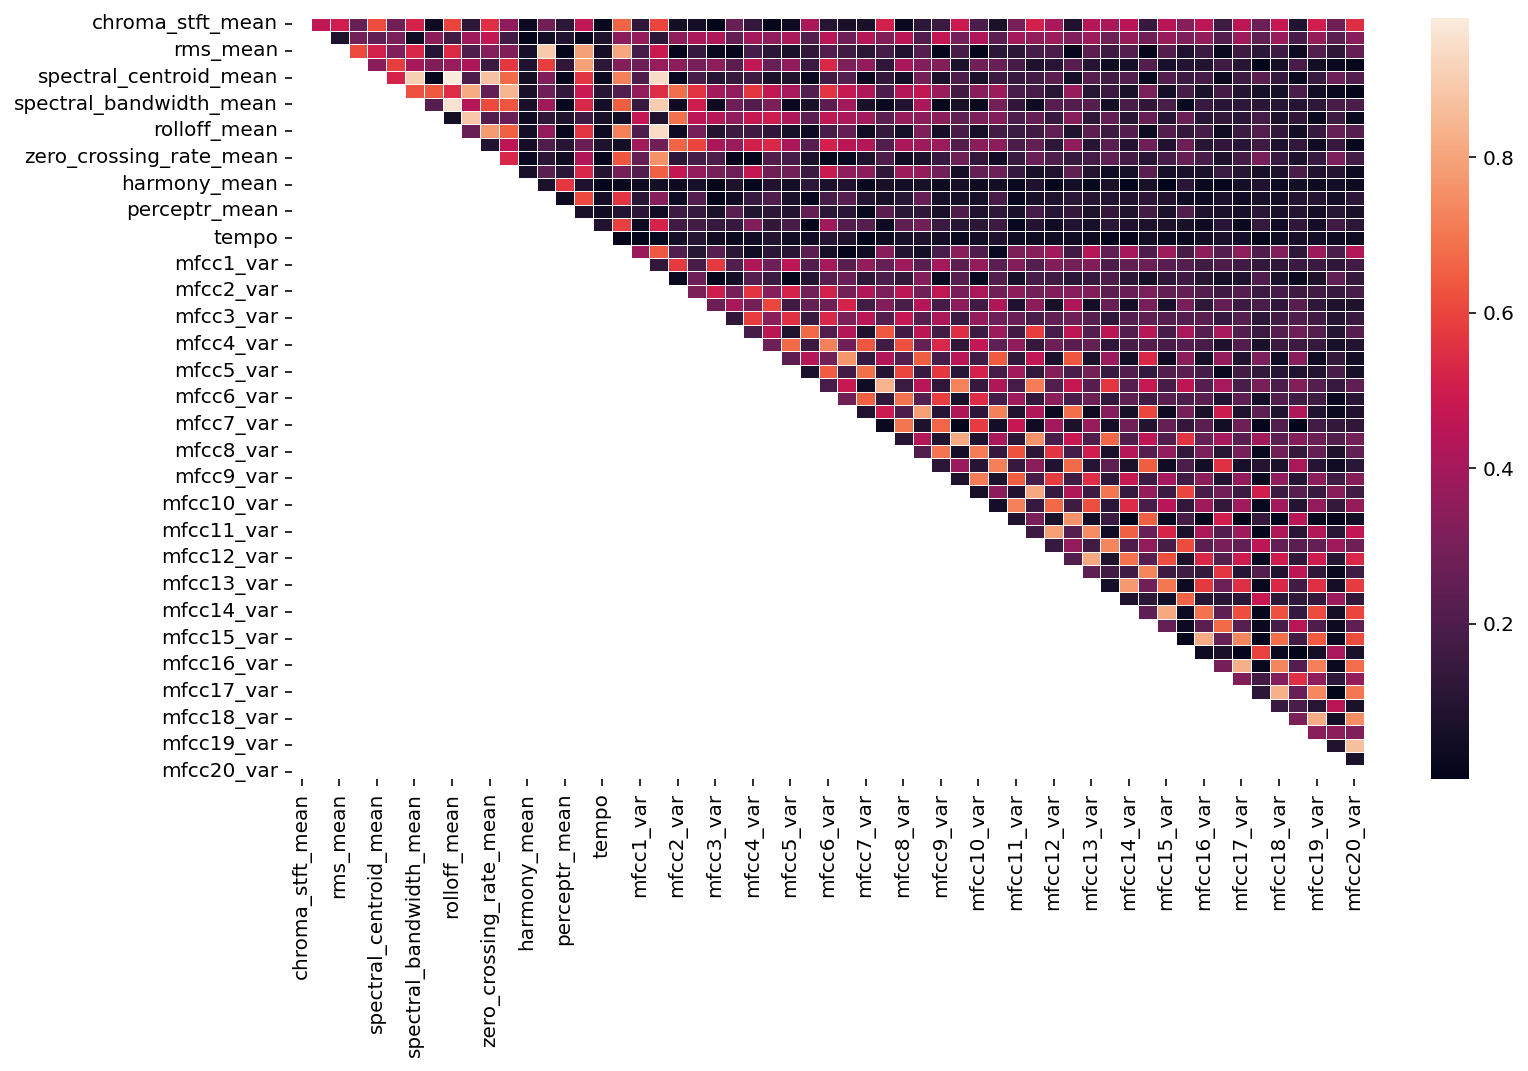

In [11]:
display(showHeatMap(pearson_correlation, "Pearson Correlation"))

|===== Spearman Correlation =====|


<AxesSubplot:>

None

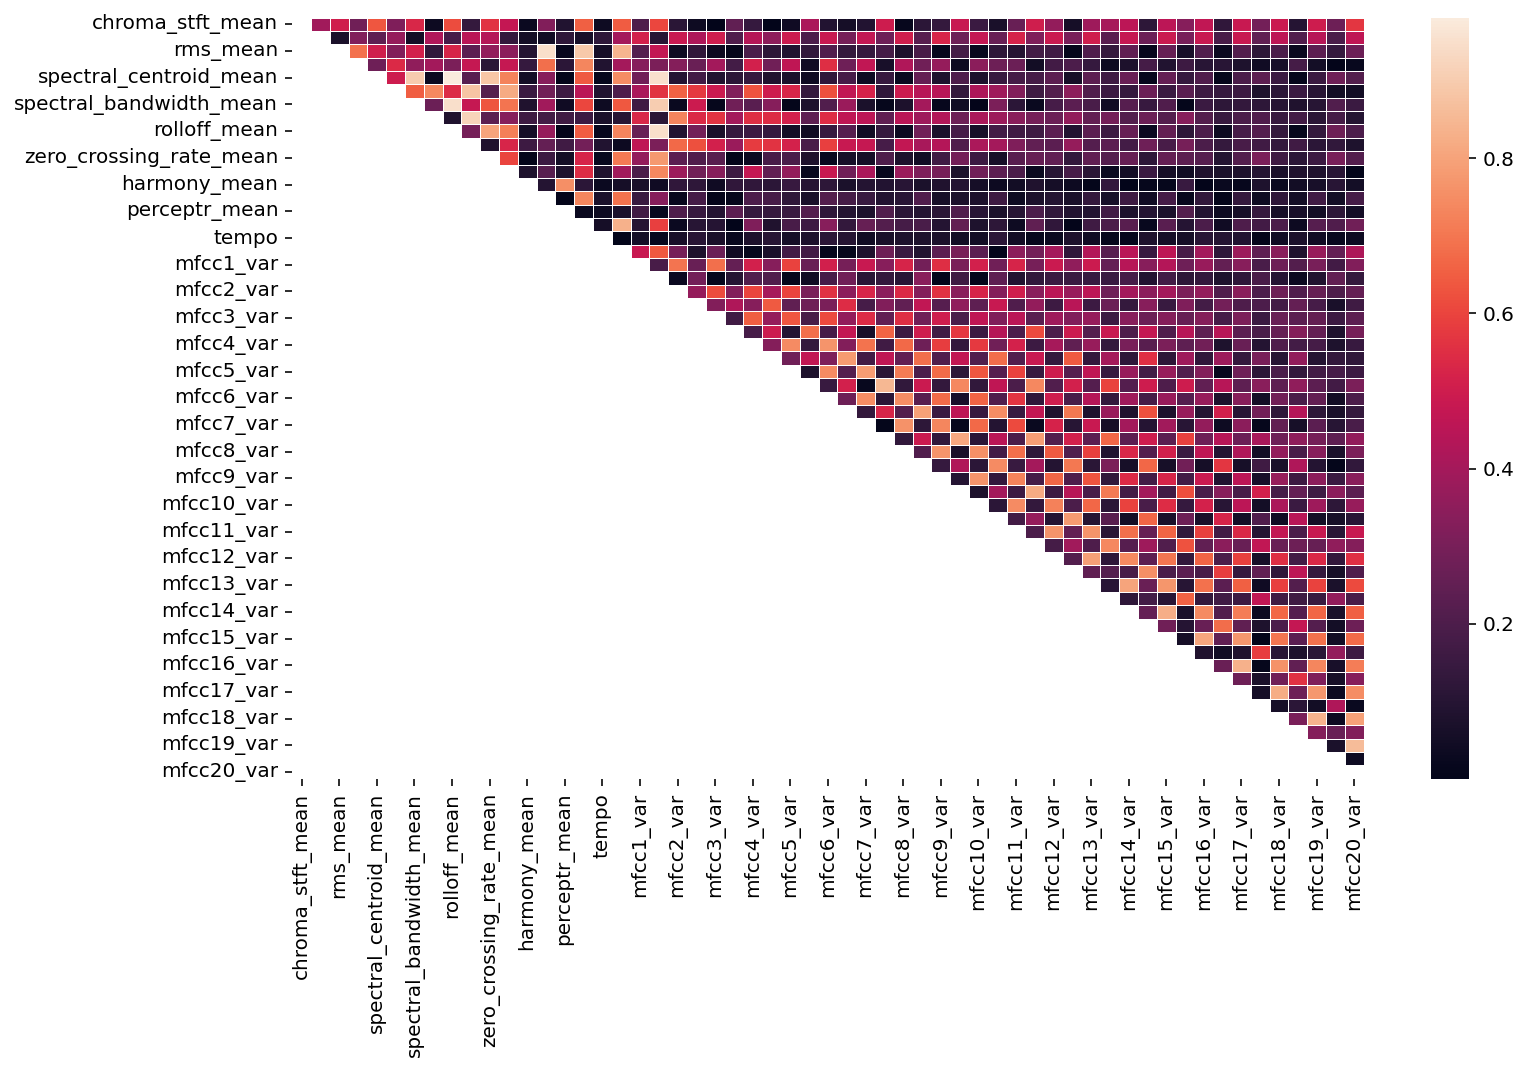

In [12]:
display(showHeatMap(spearman_correlation, "Spearman Correlation"))

|===== Kendall Correlation =====|


<AxesSubplot:>

None

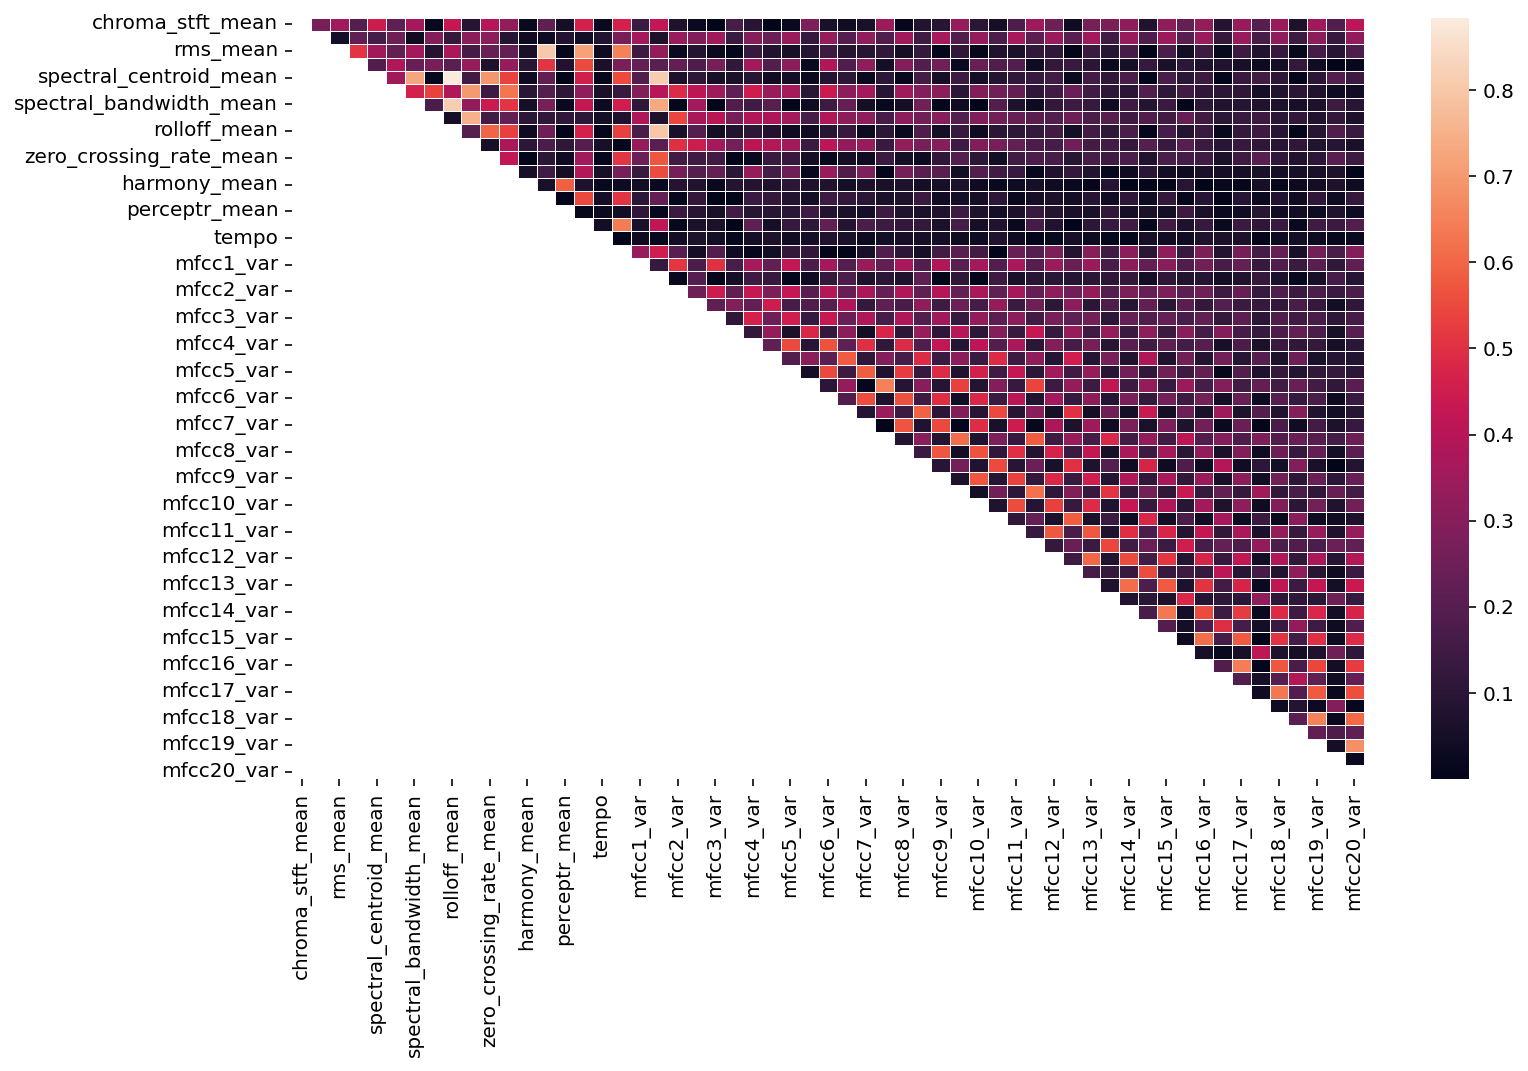

In [13]:
display(showHeatMap(kendall_correlation, "Kendall Correlation"))

# <u>Cross Validation</u>



**Pre\-Defined function to get the average accuracy found among 10 folds in different models.**



In [14]:
def cross_validations(model, modelName):
    scores = cross_val_score(model, X, y, cv = 10)
    print("Model: ", modelName, " Mean Score: ", "%.3f" % scores.mean(), " (+/- ", "%.3f" % scores.std(), ")")

## Cross Validation Scores:



In [15]:
# KNN cross validation - 10 folds
cross_validations(KNeighborsClassifier(n_neighbors = 9), "KNN")

# SVM cross validation - 10 folds
cross_validations(SVC(kernel = 'poly', decision_function_shape = "ovo"), "SVM")

# Logistic Regression cross validation - 10 folds
cross_validations(LogisticRegression(random_state = 0, solver = 'lbfgs', multi_class = 'multinomial'), "Logistic Regression")

# Random Forest cross validation - 10 folds
cross_validations(RandomForestClassifier(max_depth = 10, random_state = 0), "Random Forest")

Model:  KNN  Mean Score:  0.577  (+/-  0.096 )


Model:  SVM  Mean Score:  0.647  (+/-  0.071 )


Model:  Logistic Regression  Mean Score:  0.591  (+/-  0.056 )


Model:  Random Forest  Mean Score:  0.612  (+/-  0.077 )


# <u>Model Accuracies</u>



In [16]:
# Training and testing sets based on Pearson Correlation
Pearson_X_train, Pearson_X_test, Pearson_y_train, Pearson_y_test = train_test_split(X.loc[:, ~X.columns.isin(pearson_to_drop)], y, test_size = 0.2, random_state = 42)

# Training and testing sets based on Spearman Correlation
Spearman_X_train, Spearman_X_test, Spearman_y_train, Spearman_y_test = train_test_split(X.loc[:, ~X.columns.isin(spearman_to_drop)], y, test_size = 0.2, random_state = 42)

# Training and testing sets based on Kendall Tau Correlation
Kendall_X_train, Kendall_X_test, Kendall_y_train, Kendall_y_test = train_test_split(X.loc[:, ~X.columns.isin(kendall_to_drop)], y, test_size = 0.2, random_state = 42)

**Obtaining and comparing different model accuracies \(KNN, SVM, Cross Gradient Boost, Logistic Regression, and Random Forest\)**



In [17]:
def model_eval(model, modelName, train_set, train_labels, test_set, test_labels):
    model.fit(train_set, train_labels)
    prediction = model.predict(test_set)
    print("|======", modelName, "======|\n Accuracy: ", round(metrics.accuracy_score(test_labels, prediction), 5), "\n Precision Score: ", metrics.precision_score(test_labels, prediction, average = 'macro'), "\n Recall Score: ", metrics.recall_score(test_labels, prediction, average = 'macro'), "\n F1 Score: ", metrics.f1_score(test_labels, prediction, average = 'macro'), "\n")
    return round(metrics.accuracy_score(test_labels, prediction), 5)

In [18]:
# KNN, XGB, SVM, Logistic Regression, Random Forest defined
KNN_Model = KNeighborsClassifier(n_neighbors = 9)
SVM_Model = SVC(kernel = 'poly', decision_function_shape = "ovo")
XGBC_Model = XGBClassifier(n_estimators = 1000, learning_rate = 0.05)
LR_Model = LogisticRegression(random_state = 0, solver = 'lbfgs', multi_class = 'multinomial')
RF_Model = RandomForestClassifier(max_depth = 10, random_state = 0)

In [19]:
def printEvalResults(X_train, X_test, y_train, y_test):
    # Printing out results and metrics from different models
    KNN_Accuracy = model_eval(KNN_Model, "KNN", X_train, y_train, X_test, y_test)
    SVM_Accuracy = model_eval(SVM_Model, "SVM", X_train, y_train, X_test, y_test)
    LR_Accuracy = model_eval(LR_Model, "Logistic Regression", X_train, y_train, X_test, y_test)
    RF_Accuracy = model_eval(RF_Model, "Random Forest", X_train, y_train, X_test, y_test)
    XGBC_Accuracy = model_eval(XGBC_Model, "Cross Gradient Boost", X_train, y_train, X_test, y_test)

## Pearson Correlation Accuracies:



In [20]:
print("|| Pearson Correlation ||")
printEvalResults(Pearson_X_train, Pearson_X_test, Pearson_y_train, Pearson_y_test)

|| Pearson Correlation ||


|====== KNN ======|
 Accuracy:  0.68 
 Precision Score:  0.6857125503831656 
 Recall Score:  0.6898075724597464 
 F1 Score:  0.6804767874895744 

|====== SVM ======|
 Accuracy:  0.695 
 Precision Score:  0.7031813049675482 
 Recall Score:  0.7110448536970275 
 F1 Score:  0.700769054462625 



|====== Logistic Regression ======|
 Accuracy:  0.555 
 Precision Score:  0.5746920470833514 
 Recall Score:  0.5800070653983698 
 F1 Score:  0.5611571329234374 



|====== Random Forest ======|
 Accuracy:  0.67 
 Precision Score:  0.6749342105263159 
 Recall Score:  0.6775702687007035 
 F1 Score:  0.6712864588081293 



|====== Cross Gradient Boost ======|
 Accuracy:  0.72 
 Precision Score:  0.7401415896061995 
 Recall Score:  0.7286320475016127 
 F1 Score:  0.7272516082337954 



## Spearman Correlation Accuracies:



In [21]:
print("|| Spearman Correlation ||")
printEvalResults(Spearman_X_train, Spearman_X_test, Spearman_y_train, Spearman_y_test)

|| Spearman Correlation ||
|====== KNN ======|
 Accuracy:  0.66 
 Precision Score:  0.6619613740232936 
 Recall Score:  0.6716237675368111 
 F1 Score:  0.660811078480423 

|====== SVM ======|
 Accuracy:  0.67 
 Precision Score:  0.6874050154239952 
 Recall Score:  0.6855607564738 
 F1 Score:  0.6783201509008767 



|====== Logistic Regression ======|
 Accuracy:  0.57 
 Precision Score:  0.5916583365035377 
 Recall Score:  0.5966737320650365 
 F1 Score:  0.5752236908038223 



|====== Random Forest ======|
 Accuracy:  0.67 
 Precision Score:  0.6705402401755376 
 Recall Score:  0.676159431550736 
 F1 Score:  0.6695457102452356 



|====== Cross Gradient Boost ======|
 Accuracy:  0.715 
 Precision Score:  0.7268134759553523 
 Recall Score:  0.7263177691873344 
 F1 Score:  0.7248554684563795 



## Kendall Correlation Accuracies:



In [22]:
print("|| Kendall Correlation ||")
printEvalResults(Kendall_X_train, Kendall_X_test, Kendall_y_train, Kendall_y_test)

|| Kendall Correlation ||
|====== KNN ======|
 Accuracy:  0.645 
 Precision Score:  0.6650147214431554 
 Recall Score:  0.651865918300701 
 F1 Score:  0.6480751666178064 

|====== SVM ======|
 Accuracy:  0.705 
 Precision Score:  0.7308974080970452 
 Recall Score:  0.7163989923120357 
 F1 Score:  0.7105092880967999 



|====== Logistic Regression ======|
 Accuracy:  0.595 
 Precision Score:  0.6103433792692105 
 Recall Score:  0.6173046566959611 
 F1 Score:  0.6030423498652294 



|====== Random Forest ======|
 Accuracy:  0.655 
 Precision Score:  0.6627495537852075 
 Recall Score:  0.6650205704118749 
 F1 Score:  0.6597607735251438 



|====== Cross Gradient Boost ======|
 Accuracy:  0.705 
 Precision Score:  0.7078168985297468 
 Recall Score:  0.7222990326903371 
 F1 Score:  0.7111082468988243 



# <u>Model Analysis</u>



## KNN:



**Finding our best K\-Value to give to our model.**


In [23]:
n = 2
k_value = 0
K_Neighbours = []
Accuracy = []
Deviation = []
while k_value != 25:
    k_value = 2 * n + 1
    n += 1
    KNN_Model = KNeighborsClassifier(n_neighbors = k_value)
    scores = cross_val_score(KNN_Model, Pearson_X_train, Pearson_y_train, cv = 10)
    K_Neighbours.append(k_value)
    Accuracy.append(scores.mean())
    Deviation.append(scores.std())
    print("K Neighbours: %0.2f, Accuracy: %0.2f (+/- %0.2f)" % (k_value, scores.mean(), scores.std() * 2))

K Neighbours: 5.00, Accuracy: 0.66 (+/- 0.10)


K Neighbours: 7.00, Accuracy: 0.67 (+/- 0.10)


K Neighbours: 9.00, Accuracy: 0.67 (+/- 0.10)


K Neighbours: 11.00, Accuracy: 0.65 (+/- 0.13)


K Neighbours: 13.00, Accuracy: 0.65 (+/- 0.10)


K Neighbours: 15.00, Accuracy: 0.64 (+/- 0.10)


K Neighbours: 17.00, Accuracy: 0.63 (+/- 0.08)


K Neighbours: 19.00, Accuracy: 0.63 (+/- 0.12)


K Neighbours: 21.00, Accuracy: 0.62 (+/- 0.10)


K Neighbours: 23.00, Accuracy: 0.61 (+/- 0.12)


K Neighbours: 25.00, Accuracy: 0.61 (+/- 0.13)


**We can see from the graph and output above that the best value for our K\-Value is K = 9.**


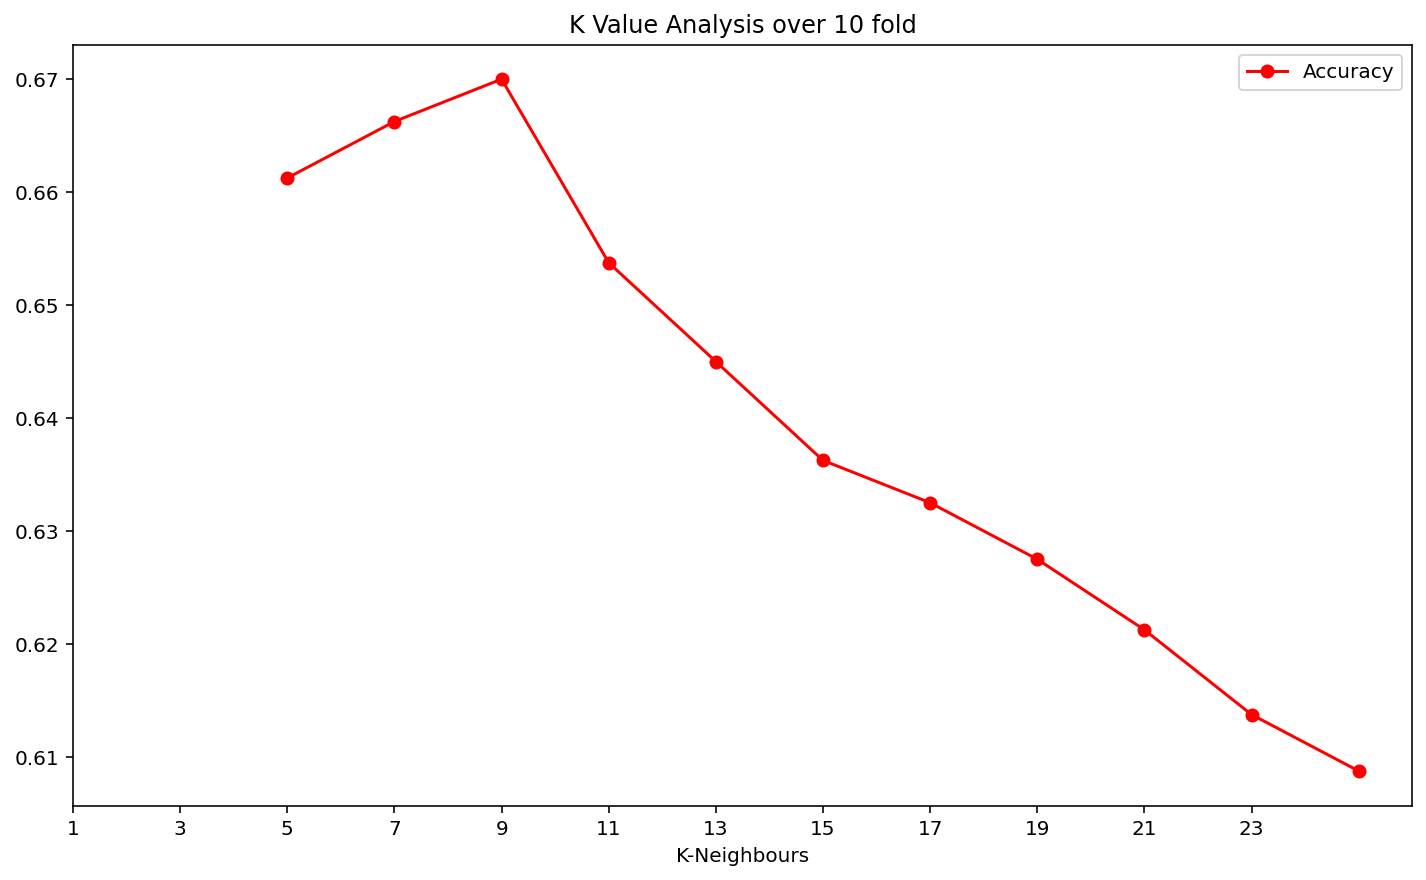

In [24]:
plt.title("K Value Analysis over 10 fold")
plt.xlabel("K-Neighbours")
plt.plot(K_Neighbours, Accuracy, marker = 'o', label = "Accuracy", color = "red")
plt.xticks(np.arange(1,25,2), np.arange(1,25,2))
plt.legend()
plt.show()

In [25]:
KNN_Model.fit(Pearson_X_train, Pearson_y_train)
prediction = KNN_Model.predict(Pearson_X_test)

In [26]:
print("Accuracy: ", metrics.accuracy_score(Pearson_y_test, prediction))
print("Precision Score: ", metrics.precision_score(Pearson_y_test, prediction, average = 'macro'))
print("Recall Score: ", metrics.recall_score(Pearson_y_test, prediction, average = 'macro'))
print("F1 Score: ", metrics.f1_score(Pearson_y_test, prediction, average = 'macro'))

Accuracy:  0.61
Precision Score:  0.6142565338295027
Recall Score:  0.6164891501413241
F1 Score:  0.6013205698605908


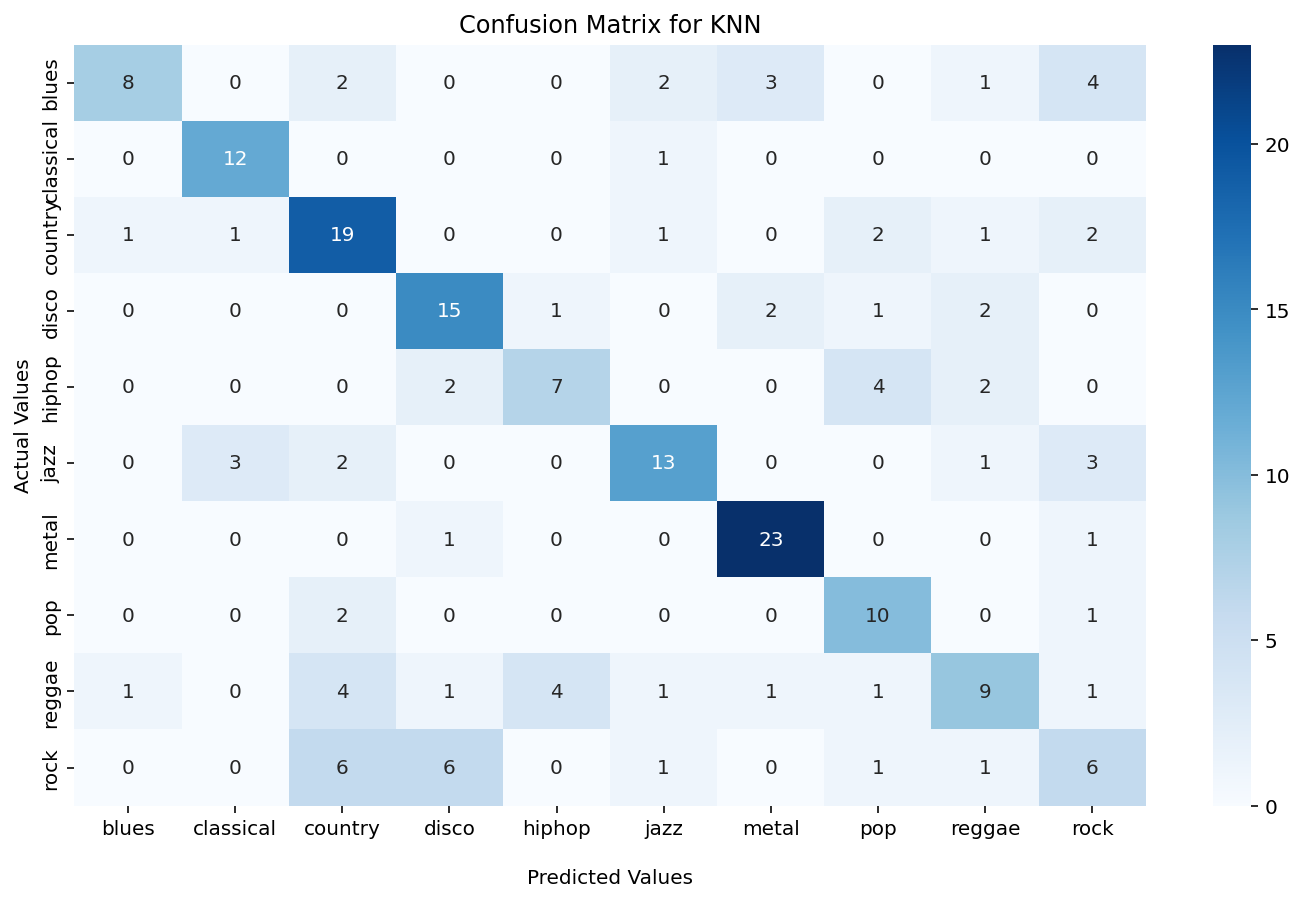

In [27]:
ax = sns.heatmap(metrics.confusion_matrix(Pearson_y_test, prediction), annot = True, cmap = 'Blues')
ax.set_title('Confusion Matrix for KNN')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"])
ax.yaxis.set_ticklabels(["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"])
plt.show()

## SVM:



In [28]:
RBF_Kernel = SVC(kernel = "rbf", decision_function_shape = "ovo")
Linear_Kernel = SVC(kernel = "linear", decision_function_shape = "ovo")
Poly_Kernel = SVC(kernel = "poly", decision_function_shape = "ovo")
Sigmoid_Kernel = SVC(kernel = "sigmoid", decision_function_shape = "ovo")

In [29]:
RBF_Kernel.fit(Pearson_X_train, Pearson_y_train)
Linear_Kernel.fit(Pearson_X_train, Pearson_y_train)
Poly_Kernel.fit(Pearson_X_train, Pearson_y_train)
Sigmoid_Kernel.fit(Pearson_X_train, Pearson_y_train)

SVC(decision_function_shape='ovo', kernel='sigmoid')

In [30]:
rbf_prediction = RBF_Kernel.predict(Pearson_X_test)
linear_prediction = Linear_Kernel.predict(Pearson_X_test)
poly_prediction = Poly_Kernel.predict(Pearson_X_test)
sigmoid_prediction = Sigmoid_Kernel.predict(Pearson_X_test)

In [31]:
print("RBF Kernel Accuracy: ", metrics.accuracy_score(Pearson_y_test, rbf_prediction))
print("Linear Kernel Accuracy: ", metrics.accuracy_score(Pearson_y_test, linear_prediction))
print("Poly Kernel Accuracy: ", metrics.accuracy_score(Pearson_y_test, poly_prediction))
print("Sigmoid Kernel Accuracy: ", metrics.accuracy_score(Pearson_y_test, sigmoid_prediction))

RBF Kernel Accuracy:  0.655
Linear Kernel Accuracy:  0.65
Poly Kernel Accuracy:  0.695
Sigmoid Kernel Accuracy:  0.05


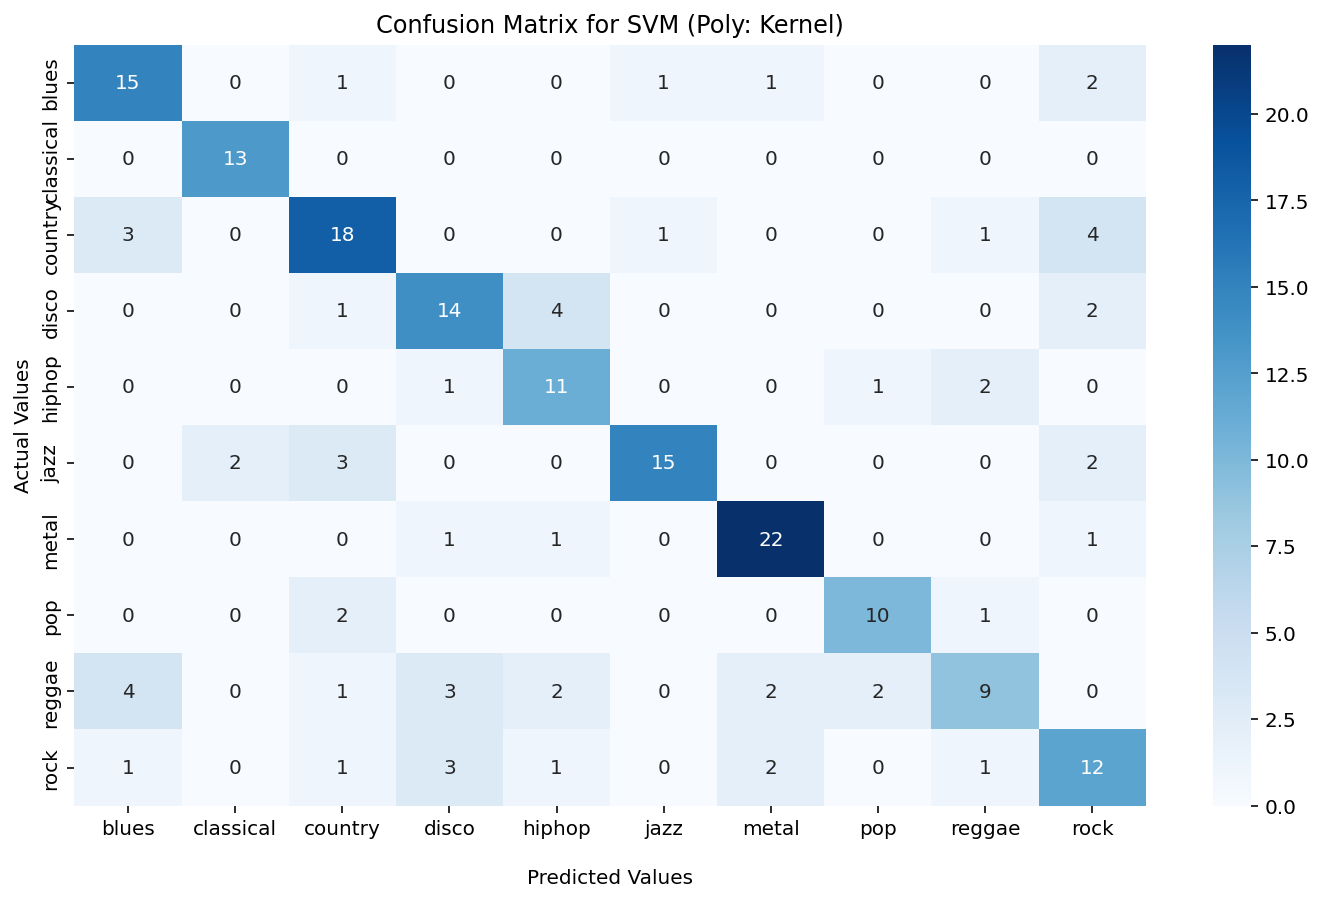

In [32]:
ax = sns.heatmap(metrics.confusion_matrix(Pearson_y_test, poly_prediction), annot = True, cmap = 'Blues')
ax.set_title('Confusion Matrix for SVM (Poly: Kernel)')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"])
ax.yaxis.set_ticklabels(["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"])
plt.show()

## Cross Gradient Boost:



In [33]:
XGBC_Model.fit(Pearson_X_train, Pearson_y_train)
prediction = XGBC_Model.predict(Pearson_X_test)

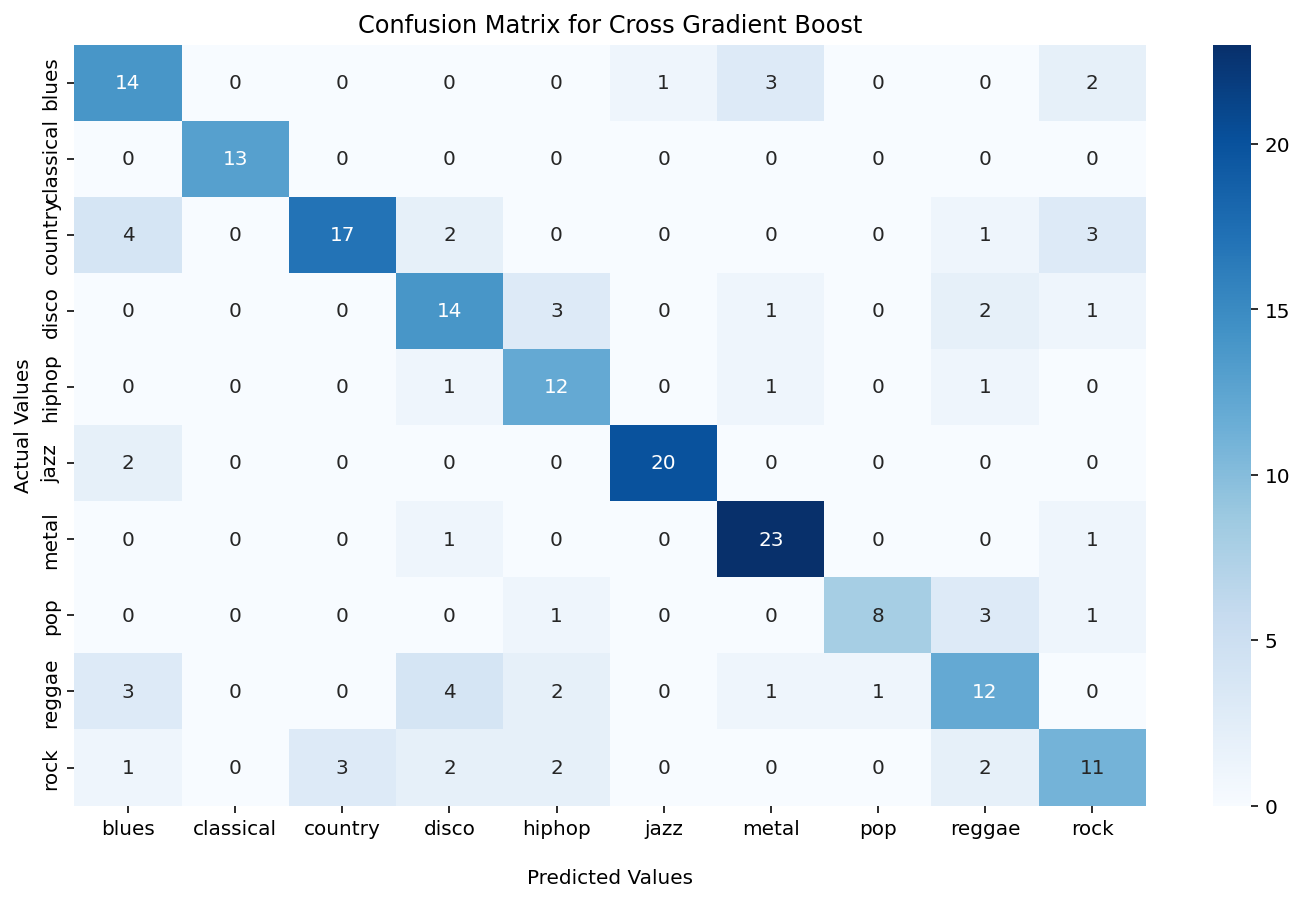

In [34]:
ax = sns.heatmap(metrics.confusion_matrix(Pearson_y_test, prediction), annot = True, cmap = 'Blues')
ax.set_title('Confusion Matrix for Cross Gradient Boost')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"])
ax.yaxis.set_ticklabels(["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"])
plt.show()